In [1]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('gym_members_exercise_tracking.csv')

In [3]:

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:

df.shape

(973, 15)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [7]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

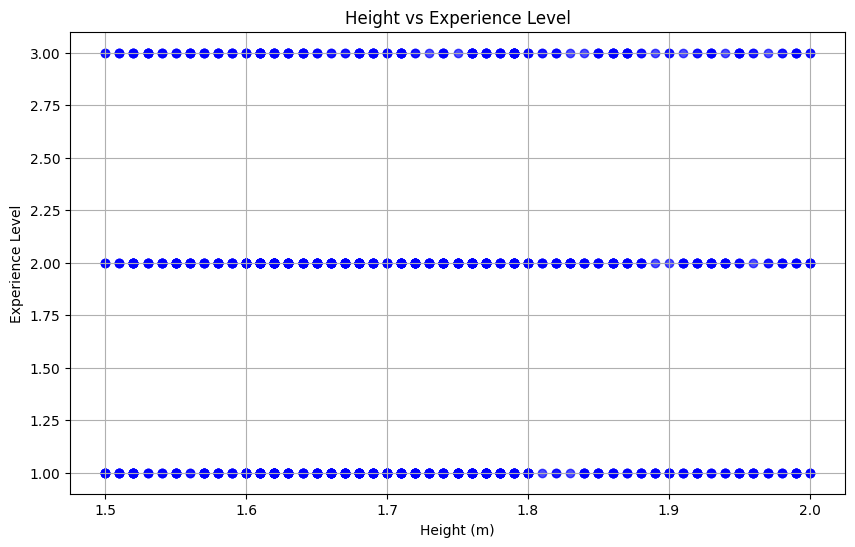

In [8]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Height (m)'], df['Experience_Level'], alpha=0.7, color='b')
plt.title("Height vs Experience Level")
plt.xlabel("Height (m)")
plt.ylabel("Experience Level")
plt.grid(True)
plt.show()

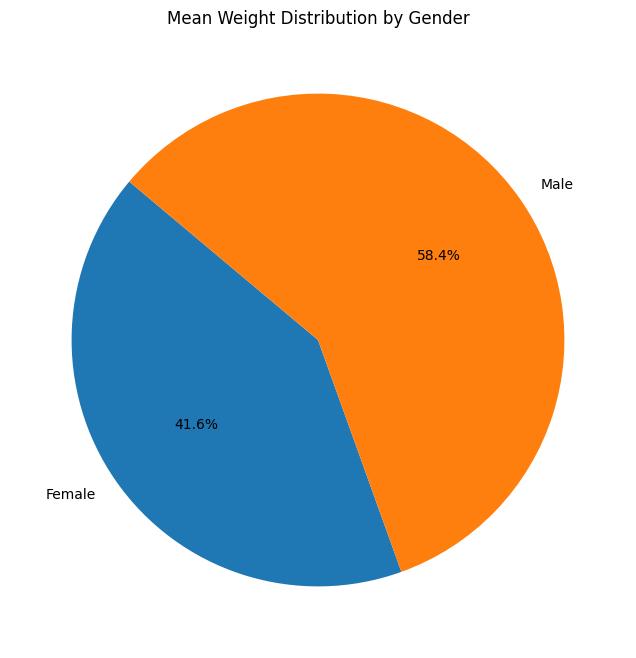

In [9]:
mean_weight_by_gender = df.groupby('Gender')['Weight (kg)'].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(mean_weight_by_gender, labels=mean_weight_by_gender.index, autopct='%1.1f%%', startangle=140)
plt.title("Mean Weight Distribution by Gender")
plt.show()

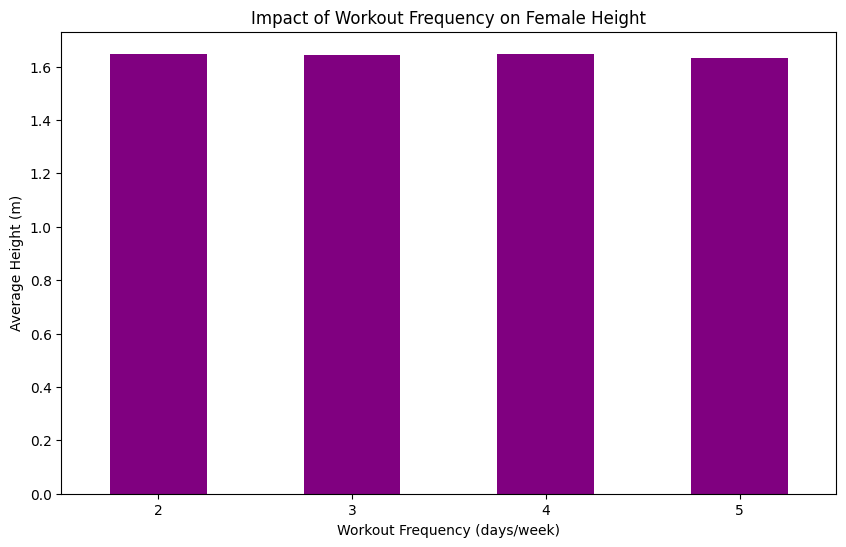

In [10]:
female_data = df[df['Gender'] == 'Female']

# Calculate the mean height for each workout frequency category for females
mean_height_by_frequency = female_data.groupby('Workout_Frequency (days/week)')['Height (m)'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_height_by_frequency.plot(kind='bar', color='purple')
plt.title("Impact of Workout Frequency on Female Height")
plt.xlabel("Workout Frequency (days/week)")
plt.ylabel("Average Height (m)")
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x800 with 0 Axes>

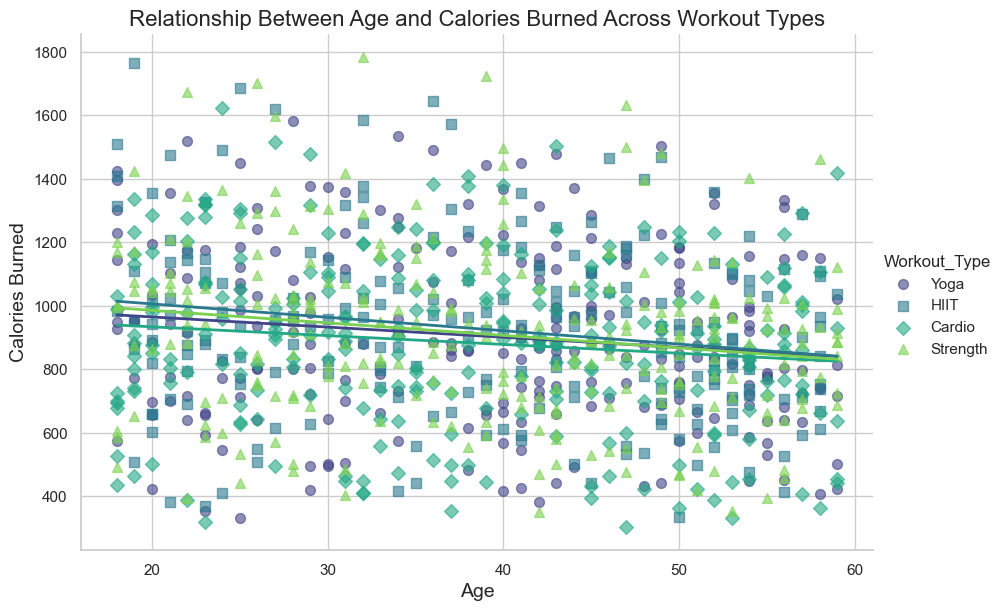

In [11]:
# Set up the plot size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create scatter plot with trend lines for each workout type
sns.lmplot(
    data=df, x="Age", y="Calories_Burned", hue="Workout_Type", 
    markers=['o', 's', 'D', '^'], palette="viridis", height=6, aspect=1.5, 
    ci=None, scatter_kws={'s': 50, 'alpha':0.6}, line_kws={'lw': 2}
)

# Add title and labels
plt.title("Relationship Between Age and Calories Burned Across Workout Types", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Calories Burned", fontsize=14)
plt.show()

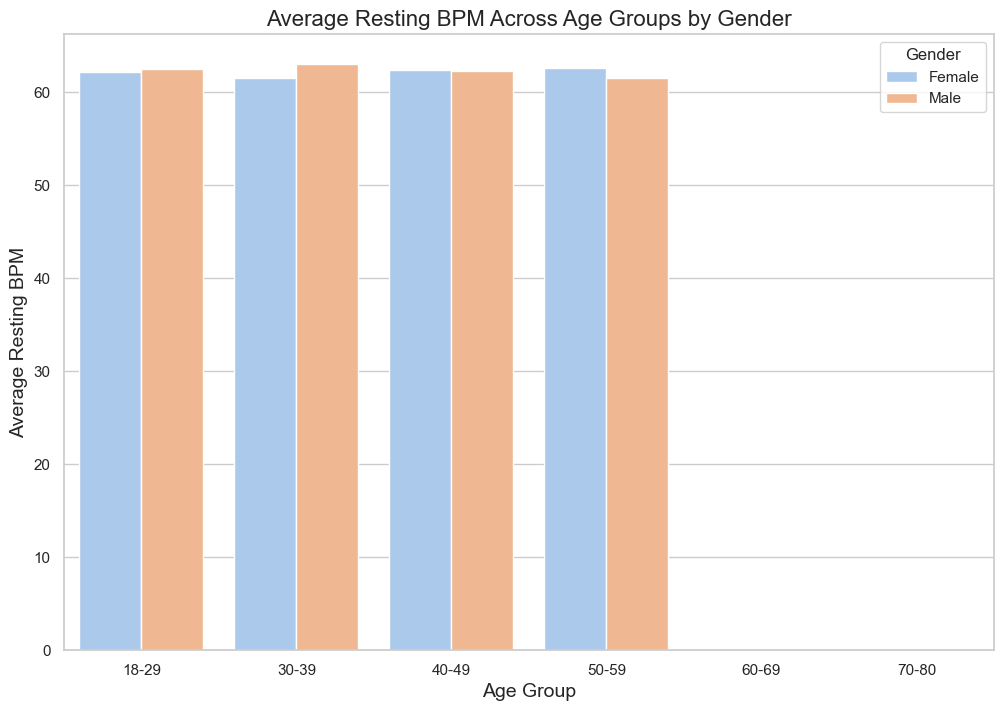

In [12]:
import seaborn as sns

# Define age groups
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70-80"]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate the average Resting BPM for each gender and age group
age_gender_bpm = df.groupby(['Age_Group', 'Gender'])['Resting_BPM'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=age_gender_bpm, x='Age_Group', y='Resting_BPM', hue='Gender', palette="pastel")

# Add title and labels
plt.title("Average Resting BPM Across Age Groups by Gender", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Average Resting BPM", fontsize=14)
plt.legend(title="Gender")
plt.show()

<Figure size 1200x800 with 0 Axes>

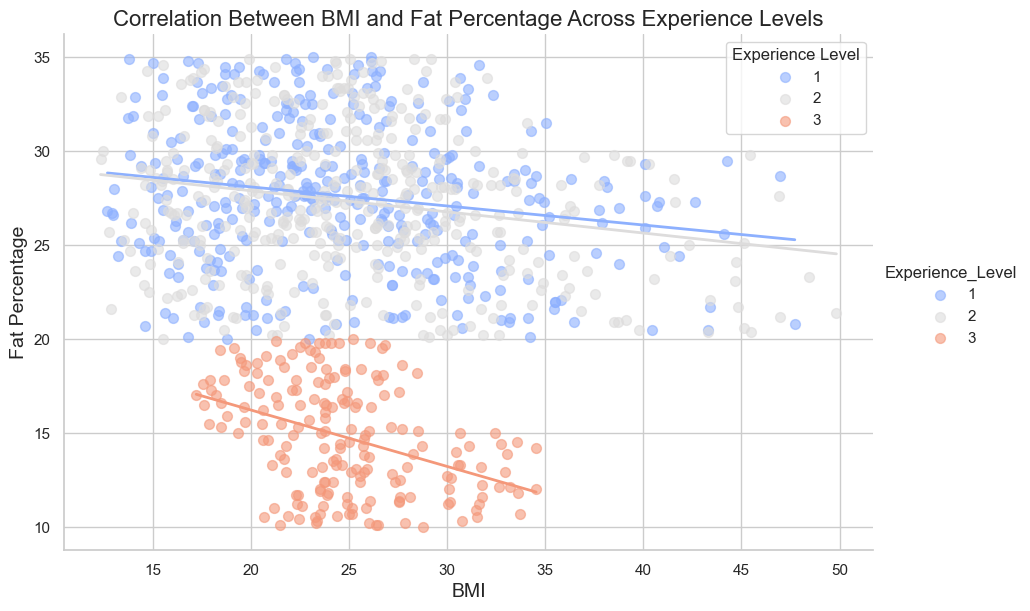

In [13]:
# Set up the plot size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create scatter plot with trend lines for each experience level
sns.lmplot(
    data=df, x="BMI", y="Fat_Percentage", hue="Experience_Level",
    palette="coolwarm", height=6, aspect=1.5, ci=None,
    scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'lw': 2}
)

# Add title and labels
plt.title("Correlation Between BMI and Fat Percentage Across Experience Levels", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Fat Percentage", fontsize=14)
plt.legend(title="Experience Level")
plt.show()